In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Generating a sample dataset

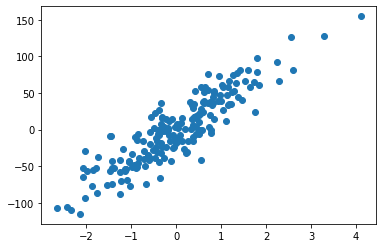

In [38]:
x, y = datasets.make_regression(n_samples = 200, n_features = 1, noise = 20, random_state = 2) 
x = x.astype(np.float32)
y = y.astype(np.float32)

plt.scatter(x, y)
plt.show()

In [39]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [40]:
print("Shape before : ", x.shape, y.shape)
y = y.view(y.shape[0], 1)

print("Shape after : ", x.shape, y.shape)

Shape before :  torch.Size([200, 1]) torch.Size([200])
Shape after :  torch.Size([200, 1]) torch.Size([200, 1])


# Designing model

In [41]:
model = nn.Linear(in_features = x.shape[1], out_features = y.shape[1])

# Loss function and optimizer

In [42]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

# Training loop

In [44]:
epochs = 100

for epoch in range(epochs):
    
    # forward pass, loss
    yhat = model.forward(x)
    loss = criterion(yhat, y)  #Predictions then actual
    
    if epoch % 5 == 0 : 
        print(f'Epoch {epoch}')
        print("Loss : ", loss.item())
    
    # backpropogation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # Emptying the gradients
    optimizer.zero_grad()

Epoch 0
Loss :  2051.2607421875
Epoch 5
Loss :  1887.3182373046875
Epoch 10
Loss :  1583.126220703125
Epoch 15
Loss :  1342.94482421875
Epoch 20
Loss :  1153.3048095703125
Epoch 25
Loss :  1003.5703735351562
Epoch 30
Loss :  885.3439331054688
Epoch 35
Loss :  791.9957885742188
Epoch 40
Loss :  718.29052734375
Epoch 45
Loss :  660.0946655273438
Epoch 50
Loss :  614.1448364257812
Epoch 55
Loss :  577.8641357421875
Epoch 60
Loss :  549.2177734375
Epoch 65
Loss :  526.599365234375
Epoch 70
Loss :  508.74041748046875
Epoch 75
Loss :  494.639404296875
Epoch 80
Loss :  483.505615234375
Epoch 85
Loss :  474.714599609375
Epoch 90
Loss :  467.7734680175781
Epoch 95
Loss :  462.2928771972656


# Evaluation

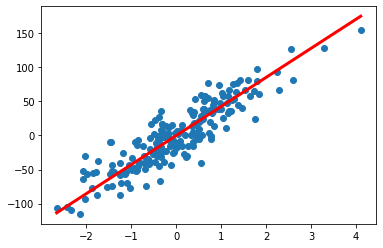

In [45]:
to_plot_range_x = np.arange(x.min().item(), x.max().item(), 0.01).astype(np.float32)
range_x = torch.from_numpy(to_plot_range_x).view(to_plot_range_x.shape[0], 1)

predicted_y = model.forward(range_x)

plt.scatter(x, y)
plt.plot(range_x, predicted_y.detach().numpy(), linewidth = 3, c='r')
plt.show()